# KDE Box Fusion (KBF) Demo

In [2]:
import sys
sys.path.append('/OpenPCDet')
import numpy as np
from pcdet.utils.box_fusion_utils import kde_fusion

# Box format (N,9) (x,y,z,length,width,height,heading,class,score)
boxes = np.array([[-17.97, 8.29, 0.60, 4.30, 1.77, 1.56, 1.48, 1, 0.54],
                  [-18.15, 7.64, 0.76, 4.40, 1.83, 1.63, -1.67, 1, 0.37],
                  [-18.06, 7.83, 0.63, 4.56, 1.81, 1.57, 1.97, 1, 0.49],
                  [-18.01, 8.06, 0.74, 4.47, 1.83, 1.61, -4.87, 1, 0.36]])

# KDE Box Fusion
kde_fusion(boxes, src_weights=boxes[:,-1])

array([-17.97      ,   8.29      ,   0.6       ,   4.43393939,
         1.81181818,   1.59181818,  -4.87      ,   1.        ,
         0.45454545])

In [3]:
# You can change the bandwidths for tuning. Higher bw is closer to average value
kde_fusion(boxes, src_weights=boxes[:,-1], bw_c=1.0, bw_dim=1.0, bw_ry=0.1, bw_cls=0.5, bw_score=2.0)

array([-17.97      ,   8.29      ,   0.6       ,   4.43656566,
         1.81969697,   1.5889899 ,  -4.87      ,   1.        ,
         0.45454545])

In practice we grab all boxes of every detector and match boxes by building a KDTree of box centroids, then we query points within a certain radius of each other. For a full implementation see our `pcdet.utils.box_fusion_utils.label_fusion` function.

If you'd like to scale weights by detectors that you know perform better, you can multiply the box scores by a scalar and use those as src_weights. `src_weights` can be greater than 1.

In [4]:
detector_box_weights = [1,1,4,6]
kde_fusion(boxes, src_weights=boxes[:,-1]*detector_box_weights)

array([-18.01      ,   8.06      ,   0.74      ,   4.43393939,
         1.81181818,   1.59181818,  -4.87      ,   1.        ,
         0.42909091])

In [12]:
import shutil

shutil.copy('/OpenPCDet/data/nuscenes/v1.0-trainval/samples/CAM_FRONT/n008-2018-09-18-12-07-26-0400__CAM_FRONT__1537287355512404.jpg',
           '/OpenPCDet/n008-2018-09-18-12-07-26-0400__CAM_FRONT__1537287355512404.jpg')

'/OpenPCDet/n008-2018-09-18-12-07-26-0400__CAM_FRONT__1537287355512404.jpg'

In [5]:
import imageio as iio
img = iio.imread('/OpenPCDet/data/nuscenes/v1.0-trainval/samples/CAM_FRONT/n008-2018-09-18-12-07-26-0400__CAM_FRONT__1537287355512404.jpg')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


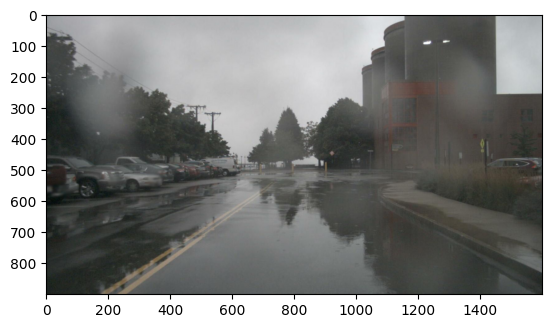

In [10]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [ ]:
plt